In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv("D:\\shru\\Sem 5\\ML\\files\\bank.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
#droping unnecessary columns
df.drop(['default', 'day', 'month','contact'], axis = 1, inplace = True)

In [6]:
df.head(10)

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,no,79,1,-1,0,unknown,no
1,33,services,married,secondary,4789,yes,yes,220,1,339,4,failure,no
2,35,management,single,tertiary,1350,yes,no,185,1,330,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,226,1,-1,0,unknown,no
5,35,management,single,tertiary,747,no,no,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,307,yes,no,341,1,330,2,other,no
7,39,technician,married,secondary,147,yes,no,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,221,yes,no,57,2,-1,0,unknown,no
9,43,services,married,primary,-88,yes,yes,313,1,147,2,failure,no


In [7]:
#checking for diff unique values for categorical columns
print(df['job'].unique())
print(df['marital'].unique())
print(df['education'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['poutcome'].unique())

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary' 'unknown']
['no' 'yes']
['no' 'yes']
['unknown' 'failure' 'other' 'success']


In [8]:
#transforming categorical columns using one-hot encoding
job = pd.get_dummies(df['job'])
marital = pd.get_dummies(df['marital'])
education = pd.get_dummies(df['education'])
housing = pd.get_dummies(df['housing'])
loan = pd.get_dummies(df['loan'])
poutcome = pd.get_dummies(df['poutcome'])

In [9]:
df.drop(['job', 'marital', 'education','housing', 'loan', 'poutcome'], axis = 1, inplace = True)

In [11]:
#concatenating modified column
df =pd.concat([df, job, marital, education, housing, loan, poutcome], axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            4521 non-null   int64 
 1   balance        4521 non-null   int64 
 2   duration       4521 non-null   int64 
 3   campaign       4521 non-null   int64 
 4   pdays          4521 non-null   int64 
 5   previous       4521 non-null   int64 
 6   y              4521 non-null   object
 7   admin.         4521 non-null   uint8 
 8   blue-collar    4521 non-null   uint8 
 9   entrepreneur   4521 non-null   uint8 
 10  housemaid      4521 non-null   uint8 
 11  management     4521 non-null   uint8 
 12  retired        4521 non-null   uint8 
 13  self-employed  4521 non-null   uint8 
 14  services       4521 non-null   uint8 
 15  student        4521 non-null   uint8 
 16  technician     4521 non-null   uint8 
 17  unemployed     4521 non-null   uint8 
 18  unknown        4521 non-null

In [13]:
df.head(10)

,age,balance,duration,campaign,pdays,previous,y,admin.,blue-collar,entrepreneur,...,tertiary,unknown,no,yes,no,yes,failure,other,success,unknown
0,30,1787,79,1,-1,0,no,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,33,4789,220,1,339,4,no,0,0,0,...,0,0,0,1,0,1,1,0,0,0
2,35,1350,185,1,330,1,no,0,0,0,...,1,0,0,1,1,0,1,0,0,0
3,30,1476,199,4,-1,0,no,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,59,0,226,1,-1,0,no,0,1,0,...,0,0,0,1,1,0,0,0,0,1
5,35,747,141,2,176,3,no,0,0,0,...,1,0,1,0,1,0,1,0,0,0
6,36,307,341,1,330,2,no,0,0,0,...,1,0,0,1,1,0,0,1,0,0
7,39,147,151,2,-1,0,no,0,0,0,...,0,0,0,1,1,0,0,0,0,1
8,41,221,57,2,-1,0,no,0,0,1,...,1,0,0,1,1,0,0,0,0,1
9,43,-88,313,1,147,2,no,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [14]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df.head(15)

,age,balance,duration,campaign,pdays,previous,y,admin.,blue-collar,entrepreneur,...,tertiary,unknown,no,yes,no,yes,failure,other,success,unknown
0,30,1787,79,1,-1,0,no,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,33,4789,220,1,339,4,no,0,0,0,...,0,0,0,1,0,1,1,0,0,0
2,35,1350,185,1,330,1,no,0,0,0,...,1,0,0,1,1,0,1,0,0,0
3,30,1476,199,4,-1,0,no,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,59,0,226,1,-1,0,no,0,1,0,...,0,0,0,1,1,0,0,0,0,1
5,35,747,141,2,176,3,no,0,0,0,...,1,0,1,0,1,0,1,0,0,0
6,36,307,341,1,330,2,no,0,0,0,...,1,0,0,1,1,0,0,1,0,0
7,39,147,151,2,-1,0,no,0,0,0,...,0,0,0,1,1,0,0,0,0,1
8,41,221,57,2,-1,0,no,0,0,1,...,1,0,0,1,1,0,0,0,0,1
9,43,-88,313,1,147,2,no,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [16]:
# creating ip and op features
X = df.drop(['y'], axis =1)
Y = df['y']

In [17]:
# Splitting the dataset into training and testing set
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size=0.2,random_state=42)

In [18]:
nbclassifier = GaussianNB()
nbclassifier.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
Y_pred = nbclassifier.predict(X_test)

In [20]:
df=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
df

,Actual,Predicted
2398,no,no
800,no,yes
2288,no,no
2344,no,no
3615,no,no
...,...,...
3589,yes,yes
3128,no,no
3259,no,no
4239,no,no


In [21]:
print('Accuracy of model: %4.2f '%(accuracy_score(Y_test, Y_pred)*100))

Accuracy of model: 82.65 


In [22]:
print('Classification Report :\n',classification_report(Y_test, Y_pred))

Classification Report :
               precision    recall  f1-score   support

          no       0.93      0.87      0.90       807
         yes       0.29      0.43      0.35        98

    accuracy                           0.83       905
   macro avg       0.61      0.65      0.62       905
weighted avg       0.86      0.83      0.84       905



In [23]:
print(confusion_matrix(Y_test,Y_pred))

[[706 101]
 [ 56  42]]


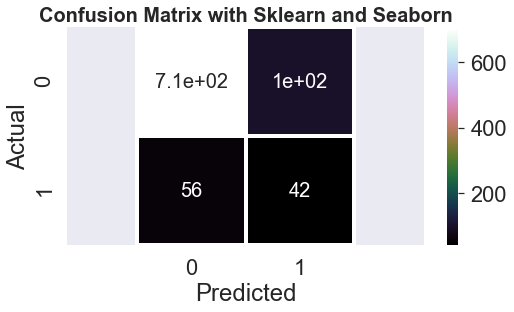

In [24]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,4))
    sns.set(font_scale=2)
    sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,square=True,annot_kws={"size":20},linewidth=3,cmap='cubehelix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.axis('equal')
    plt.title("Confusion Matrix with Sklearn and Seaborn",fontweight='bold',fontsize=20)
    plt.show()